<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Airbnb data analysis - *Amsterdam*

 This analysis aims to explore [Airbnb](https://www.airbnb.com) listings in Amsterdam, uncovering key insights about pricing, reviews, and neighbourhood trends. Our goal is to provide valuable information for both potential Airbnb hosts and guests to make informed decisions.

At [Inside Airbnb](http://insideairbnb.com/get-the-data.html) we can find data about the listings from cities all over the world. Here, we take a look at **Amsterdam** in The Netherlands.

## Takeaways
1. Properties listed in Amsterdam Zuid are the most expensive to rent, with an average price of € 284,00 per night. Meanwhile, the cheapest location for an Airbnb in Amsterdam is Bijmer-Oost, with an average price per night of € 124,00.
2. The average price per night one can expect when using Airbnb to stay in Amsterdam is € 247,00. 
3. Most users on Airbnb will find that most listings in Amsterdam are for entire homes or apartments (64% of total listings, against 24% private rooms and only 1% hotel rooms). 

## Getting data

Before diving into the analysis, we need to gather the necessary data and tools.

### Importing Necessary Packages
We start by importing essential Python packages that will help us manipulate and visualize the data.

In [201]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

Next, we load the Airbnb dataset into a Pandas DataFrame. This dataset contains various details about Airbnb listings in Amsterdam.

In [202]:
# importing csv file containing airbnb data into a DataFrame
df = pd.read_csv("./ams-listings.csv",index_col='id')
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
262394,Charming Studio with Roof Terrace,1376607,Martin,NaN,Zuid,52.356950,4.852340,Private room,NaN,3,113,2019-10-07,0.78,1,0,0,0363 B86D 98DE 3A24 8790
286500,"Centre, canal view with private bathroom",1491565,David,NaN,Centrum-West,52.375610,4.900000,Private room,148.0,3,373,2024-03-07,2.53,2,188,23,0363 DF01 FBC0 496B 9730
283170,5-bedrooms house; central location,1451657,Marco,NaN,Zuid,52.354350,4.873160,Entire home/apt,950.0,2,124,2023-10-08,0.85,1,0,6,0363 0240 34A0 48C3 6D81
290701,"Central, big window, rear room with private bath.",1491565,David,NaN,Centrum-West,52.375610,4.900000,Private room,138.0,3,448,2024-03-03,3.05,2,220,42,0363 DF01 FBC0 496B 9730
304082,Private+quiet studio in the heart of town+balc...,276068,Mirre,NaN,Centrum-West,52.372390,4.896570,Private room,142.0,3,294,2024-02-23,2.02,1,241,69,0363 6C40 7413 ADD3 9AF8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108849181649536044,Lovely stay,28916643,Nadia,NaN,Slotervaart,52.363420,4.837510,Entire home/apt,250.0,1,0,NaN,NaN,1,269,0,0363 A050 B431 A291 0710
1109126469335118294,Cozy apartment on hot spot.,50711042,Marc,NaN,Centrum-Oost,52.361767,4.887471,Entire home/apt,245.0,1,0,NaN,NaN,3,242,0,0363 B483 73B8 AEDB EFA4
1109162493263343239,Great stay at top location.,50711042,Marc,NaN,Centrum-Oost,52.361990,4.885580,Entire home/apt,341.0,1,0,NaN,NaN,3,239,0,0363 B483 73B8 AEDB EFA4


## Data Analysis

With our data loaded, let’s proceed to analyze it. We’ll begin by understanding the structure and contents of the dataset.


**Variable dictionary**
.
* id: listing's unique identifier number (categorical).
* name: listing's name (categorical).
* host_id: host's unique identifier number (categorical).
* host_name: host's name (categorical).
* neighbourhood_group: no data.
* neighbourhood: listing's neighbourhood (categorical).
* latitude: coordinates lat (numerical).
* longitude: coordinates long (numerical).
* room_type: type of listing, such as room, whole apartment, etc... (categorical).
* price: price per day (numerical).
* minimum_nights: the minimum amount of nights a guest has to stay to be able to book the listing (numerical).
* number_of_reviews: how many times the listing has received reviews from guests (numerical).
* last_review: date when the last review was left by a guest (categorical in this case - doesn't make sense to perform operations between last review dates between listings, we want to simply know the date).
* reviews_per_month: reviews per month (numerical).
* calculated_host_listings_count: number of listings the host has on airbnb (numerical).
* availability_365: days the listing is available for in a period of 365 days (numerical).
* number_of_reviews_ltm: number of reviews received in the last twelve months (numerical).
* license: listing's licence or permit code, if a license or permit is required (categorical).

Before any analysis can be done, let's check our dataset.

In [203]:
# display first five rows
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
262394,Charming Studio with Roof Terrace,1376607,Martin,NaN,Zuid,52.35695,4.85234,Private room,NaN,3,113,2019-10-07,0.78,1,0,0,0363 B86D 98DE 3A24 8790
286500,"Centre, canal view with private bathroom",1491565,David,NaN,Centrum-West,52.37561,4.90000,Private room,148.0,3,373,2024-03-07,2.53,2,188,23,0363 DF01 FBC0 496B 9730
283170,5-bedrooms house; central location,1451657,Marco,NaN,Zuid,52.35435,4.87316,Entire home/apt,950.0,2,124,2023-10-08,0.85,1,0,6,0363 0240 34A0 48C3 6D81
290701,"Central, big window, rear room with private bath.",1491565,David,NaN,Centrum-West,52.37561,4.90000,Private room,138.0,3,448,2024-03-03,3.05,2,220,42,0363 DF01 FBC0 496B 9730
304082,Private+quiet studio in the heart of town+balc...,276068,Mirre,NaN,Centrum-West,52.37239,4.89657,Private room,142.0,3,294,2024-02-23,2.02,1,241,69,0363 6C40 7413 ADD3 9AF8


### **Q1. How many variables and how many data points are there in our dataset? What are the types of variables?**

Understanding the size of our dataset is crucial. We check the number of rows and columns to get a sense of its volume.

In [204]:
# identify volume of data
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")
df.dtypes

Data has 8945 rows and 17 columns.


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

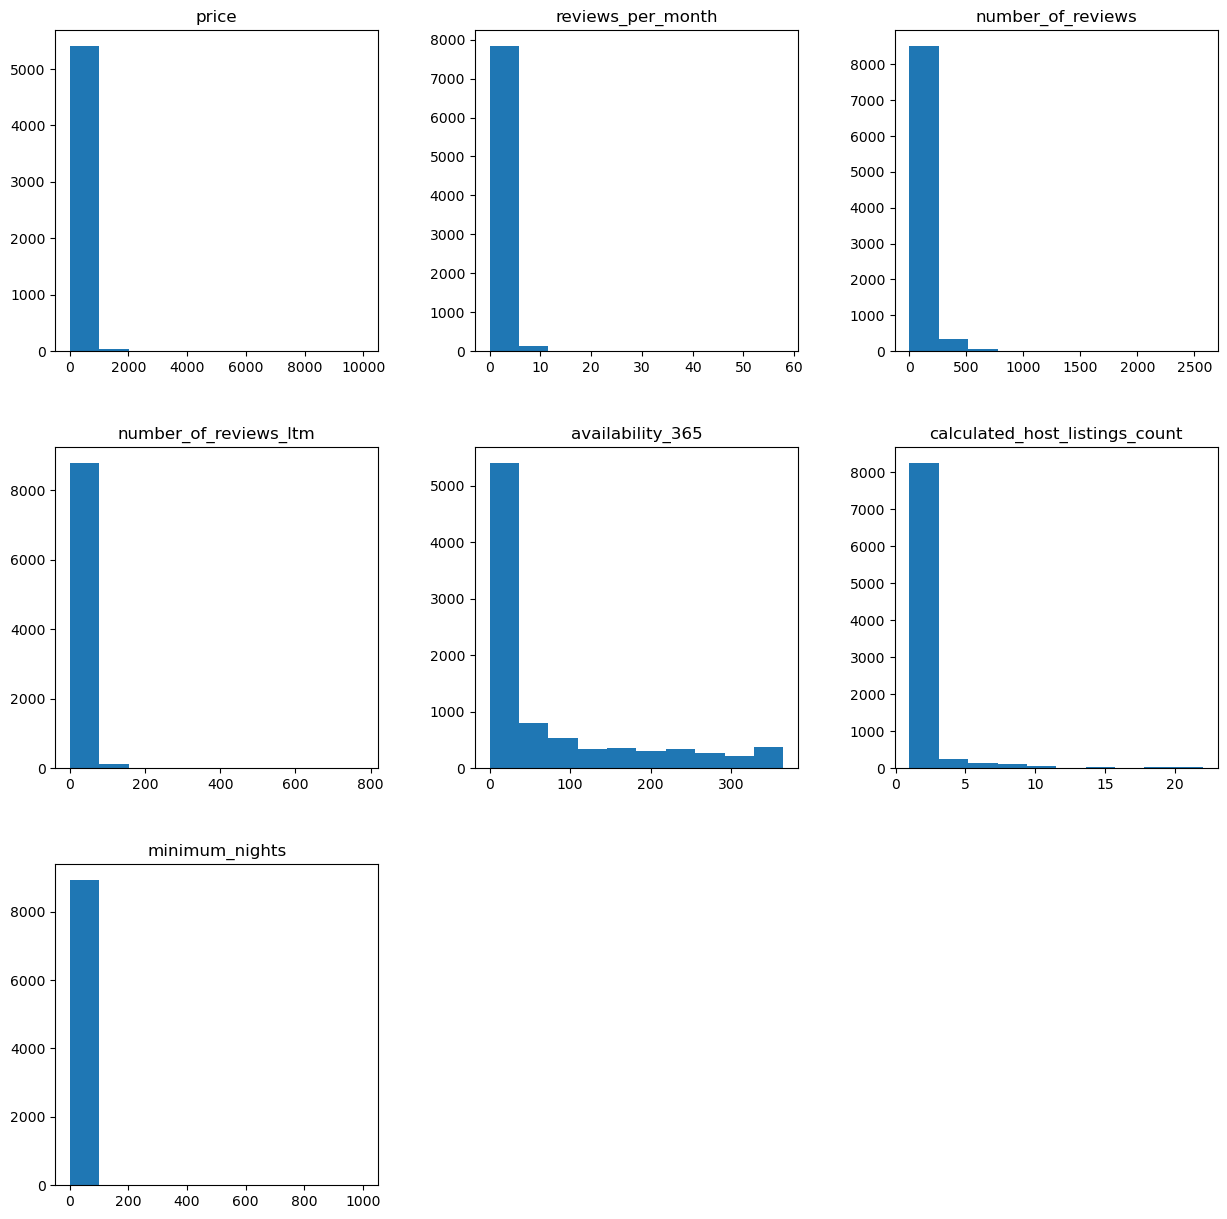

In [205]:
df.hist(column=['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights'], 
        bins=10, 
        figsize=(15,15), 
        grid=False);

### **Q2. What is the percentage of missing data?**

Missing data can significantly impact our analysis. Here, we calculate the percentage of missing values in each column.

In [206]:
# ordering the amount of missing values in the dataset per column
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

neighbourhood_group               1.000000
price                             0.390274
last_review                       0.107323
reviews_per_month                 0.107323
license                           0.010732
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
host_name                         0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
name                              0.000000
dtype: float64

## Cleaning dataset

Data cleaning is a critical step to ensure our analysis is accurate. We’ll handle missing data and remove outliers.

* The *neighbourhood_group* column has no data, so we can drop it.
* There are 960 listings that seemingly haven't been reviewed yet, these shouldn't be removed just because they're missing values.
* The license missing values could just be filled with "exempted", since it's likely that data wasn't entered because the listing is exempted from having a license. 
* Nearly 40%  of listings don't have a price. Let's see what we can do about it. 

In [207]:
# dropping the empty column
df_clean = df.drop(columns=['neighbourhood_group'])

# filling missing license data with "Exempt"
df_clean = df_clean.fillna({'license':"Exempt"})

### Handling Missing Data

We notice that the ‘neighbourhood_group’ column has only missing values, so we drop it to clean our dataset.

In [208]:
df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].describe().round(2)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
count,5454.00,7985.00,8945.00,8945.00,8945.00,8945.00,8945.00
mean,256.57,1.00,45.02,9.96,71.21,1.73,4.20
std,244.98,1.83,107.30,24.33,103.85,2.46,19.79
min,10.00,0.01,0.00,0.00,0.00,1.00,1.00
25%,150.00,0.23,3.00,0.00,0.00,1.00,2.00
50%,213.00,0.45,9.00,3.00,13.00,1.00,3.00
75%,300.00,0.94,34.00,7.00,106.00,1.00,4.00
max,10000.00,57.84,2575.00,781.00,365.00,22.00,1001.00


### Cleaning minimum_nights

Outliers can skew our results. We plot a boxplot for ‘minimum_nights’ to identify and remove extreme values.

The data related to reviews seem plausible. Even the maximum number of reviews in the last 12 months being 781 can be true for a property that is trending, for example.
However, the minimum nights has some clear outliers, with listings with a minimum nights of more than a year. 

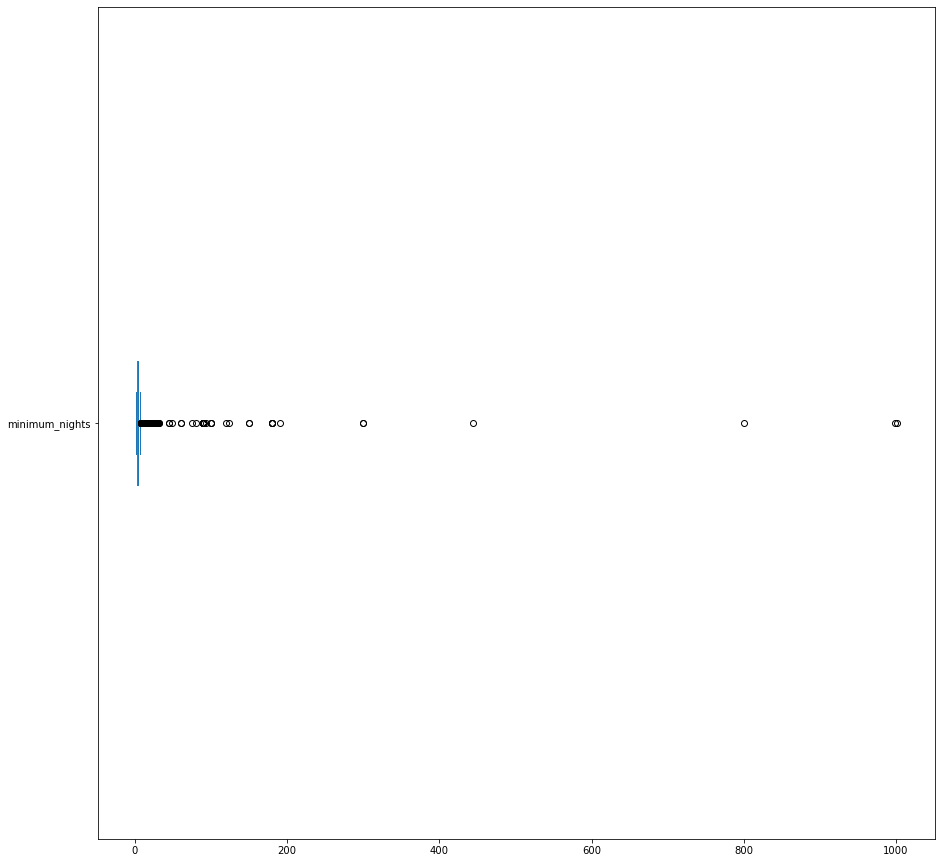

In [209]:
plt.figure(dpi=72)
df_clean.minimum_nights.plot(kind='box',
                             vert=False,
                             figsize=(15,15));

In [210]:
df_clean.minimum_nights.sort_values(ascending=False).iloc[0:9]

id
18816109               1001
30140860                999
7394725                 800
19343174                444
19183967                300
1914964                 300
1014251280696672206     190
12577304                180
929613629343842634      180
Name: minimum_nights, dtype: int64

In [211]:
# calculating the interquartile range (IQR)
min_nights_q3 = df_clean.minimum_nights.quantile(.75)
min_nights_iqr = df_clean.minimum_nights.quantile(.75) - df_clean.minimum_nights.quantile(.25)

# filtering dataset to exclude the outliers using the IQR
df_clean = df_clean[df_clean['minimum_nights'] < (min_nights_q3+min_nights_iqr*1.5)]
df_clean.minimum_nights.describe()

count    8276.000000
mean        2.646689
std         1.220218
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: minimum_nights, dtype: float64

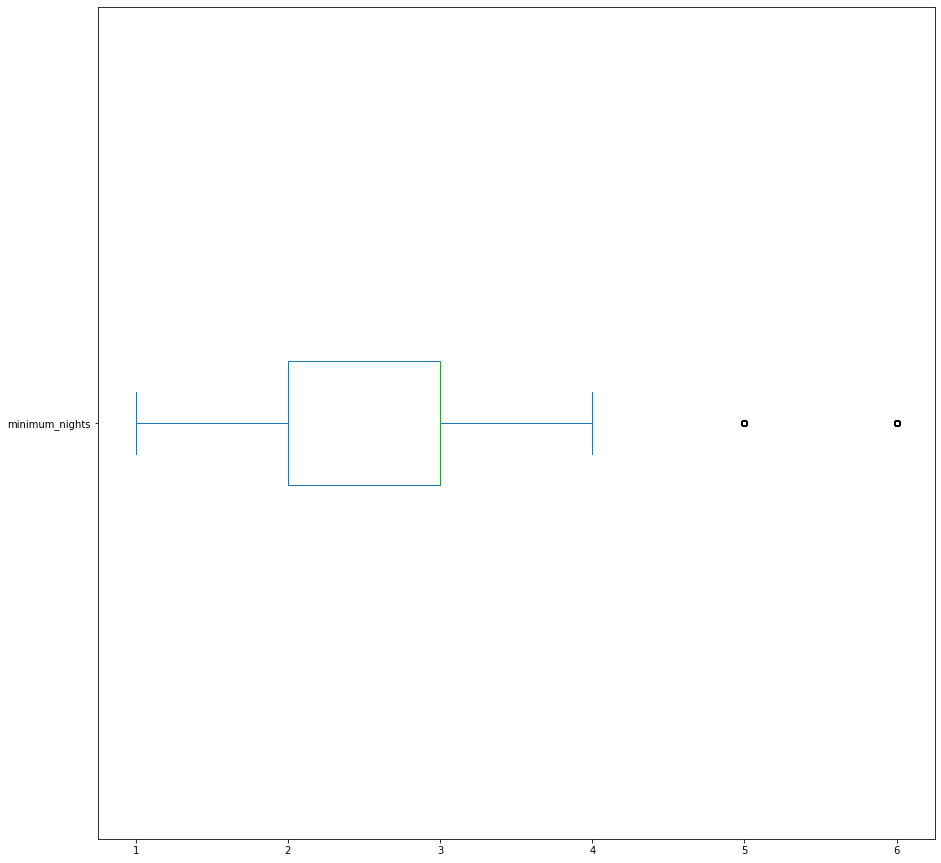

In [212]:
plt.figure(dpi=72)
df_clean.minimum_nights.plot(kind='box',
                             vert=False,
                             figsize=(15,15),
                             );

### Cleaning price data

After checking the listings on [Airbnb](https://www.airbnb.com/rooms/2474754?adults=1&children=0&enable_m3_private_room=true&infants=0&location=Amsterdam%2C%20Netherlands&pets=0&search_mode=regular_search&check_in=2024-06-08&check_out=2024-06-13&source_impression_id=p3_1717843756_P3kwXwnWSOuO1hTi&previous_page_section_name=1001&federated_search_id=e370e06c-0227-42c1-8cd4-af81e87b4eef) we can find that the one with a $10.000,00 per night rate seems like a standard apartment, albeit in a good location. No reviewers said anything about the price. 

My hypothesis is that the host has changed the price to dissuade people from booking, instead of removing the listing from Airbnb. I believe we can safely remove this listing.
We can also remove the second highest price because they are clear outliers. Let's see the effect of these outliers on the mean. 

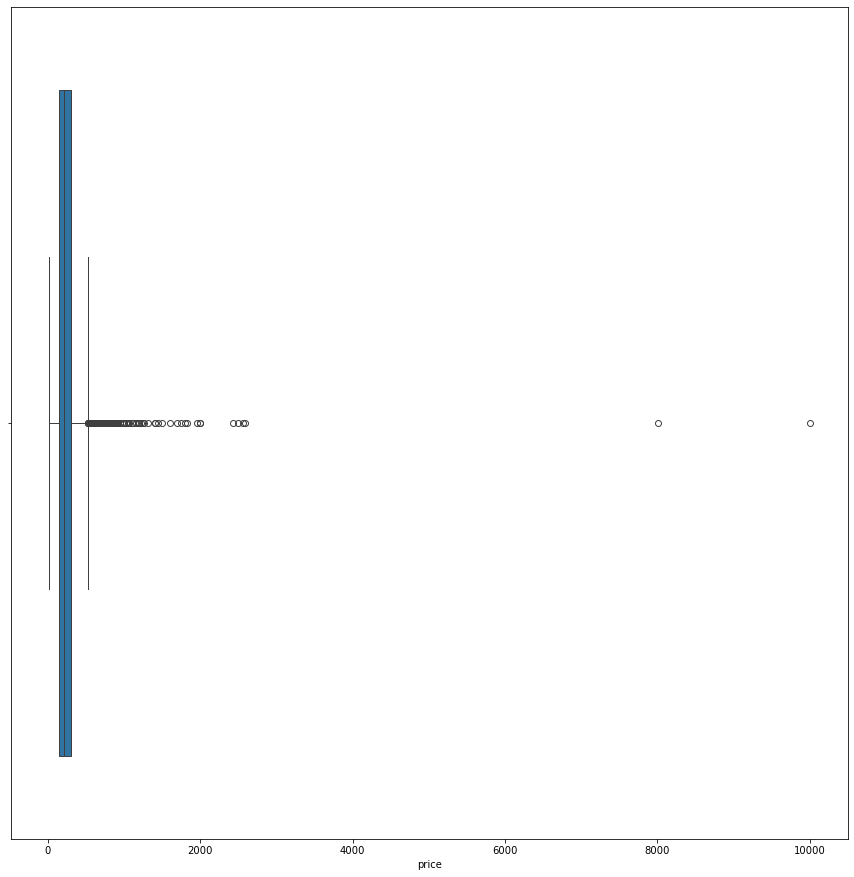

In [213]:
plt.figure(figsize=(15,15),dpi=72)
sns.boxplot(data=df_clean,x='price');

In [214]:
# top 10 most expensive listings in Amsterdam
df_clean.price.sort_values(ascending=False).iloc[0:9]

id
2474754               10000.0
897037429506065313     8014.0
612289973482163299     2591.0
643315499225242586     2561.0
15251558               2500.0
830497096365305089     2430.0
19939329               2000.0
721526610086726373     1995.0
53061883               1950.0
Name: price, dtype: float64

In [215]:
# filtering dataset
df_clean = df_clean[df_clean['price'] < 8000]
df_clean.price.describe()

count    5039.000000
mean      253.424886
std       176.817116
min        10.000000
25%       150.000000
50%       214.000000
75%       300.000000
max      2591.000000
Name: price, dtype: float64

In [216]:
df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].describe().round(2)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
count,5039.00,4492.00,5039.00,5039.00,5039.00,5039.00,5039.00
mean,253.42,1.41,64.34,15.23,106.56,1.87,2.54
std,176.82,2.30,134.76,30.80,109.47,2.62,1.21
min,10.00,0.01,0.00,0.00,0.00,1.00,1.00
25%,150.00,0.35,3.00,1.00,15.00,1.00,2.00
50%,214.00,0.64,11.00,5.00,63.00,1.00,2.00
75%,300.00,1.65,58.00,13.00,181.50,1.00,3.00
max,2591.00,57.84,2575.00,781.00,365.00,22.00,6.00


<Axes: xlabel='price'>

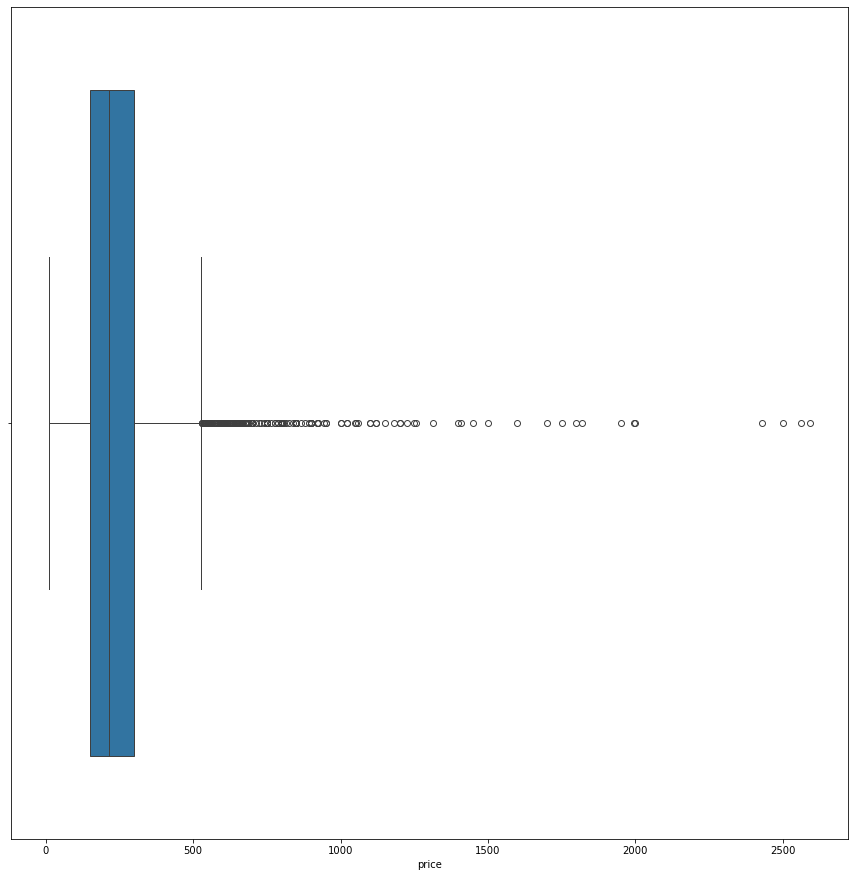

In [217]:
plt.figure(figsize=(15,15),dpi=72)
sns.boxplot(data=df_clean,x='price')

In [218]:
# checking for remaining missing values
df_clean.isnull().sum().sort_values(ascending=False)

last_review                       547
reviews_per_month                 547
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                             0
dtype: int64

In [219]:
df_clean[['price','reviews_per_month']].describe().round(2)

,price,reviews_per_month
count,5039.00,4492.00
mean,253.42,1.41
std,176.82,2.30
min,10.00,0.01
25%,150.00,0.35
50%,214.00,0.64
75%,300.00,1.65
max,2591.00,57.84


### Remaining missing values

There are still 547 missing values in both *last_review* and *reviews_per_month*. I believe these are either listings that have just recently been uploaded and haven't been booked yet, or listings that are very unpopular. 
In this case we can choose wether to keep these listings or not. For the purpose of this analysis, I believe these listings are not relevant, and removing them should not have a negative impact on the analysis.

In [220]:
# dropping these newly created listings
df_clean = df_clean.dropna(subset=['last_review','reviews_per_month'],axis='index')
df_clean.isnull().sum().sort_values(ascending=False)

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [221]:
df_clean[['price','reviews_per_month']].describe().round(2)

,price,reviews_per_month
count,4492.00,4492.00
mean,247.31,1.41
std,161.71,2.30
min,10.00,0.01
25%,148.00,0.35
50%,210.00,0.64
75%,300.00,1.65
max,2500.00,57.84


We successfully removed missing values and  outliers because: 

* Removing the listings with *minimum_nights* that were calculated as outliers didn't affect the dataset significantly. Less than 10% of rows were removed and the mean and median remained 3 days.
* The standard deviation for *price* went down by around 35%. 
* Median for *price* and *minimum_nights* is still the same.
* Getting rid of missing values in the *reviews_per_month* didn't affect other variables negatively, so we safely removed missing values and outliers. 

### **Q3. What is the distribution for the numerical variables?**

With a clean dataset, we now explore various aspects of the data to extract meaningful insights.
We examine the distribution of key numerical variables to understand their spread and central tendencies.

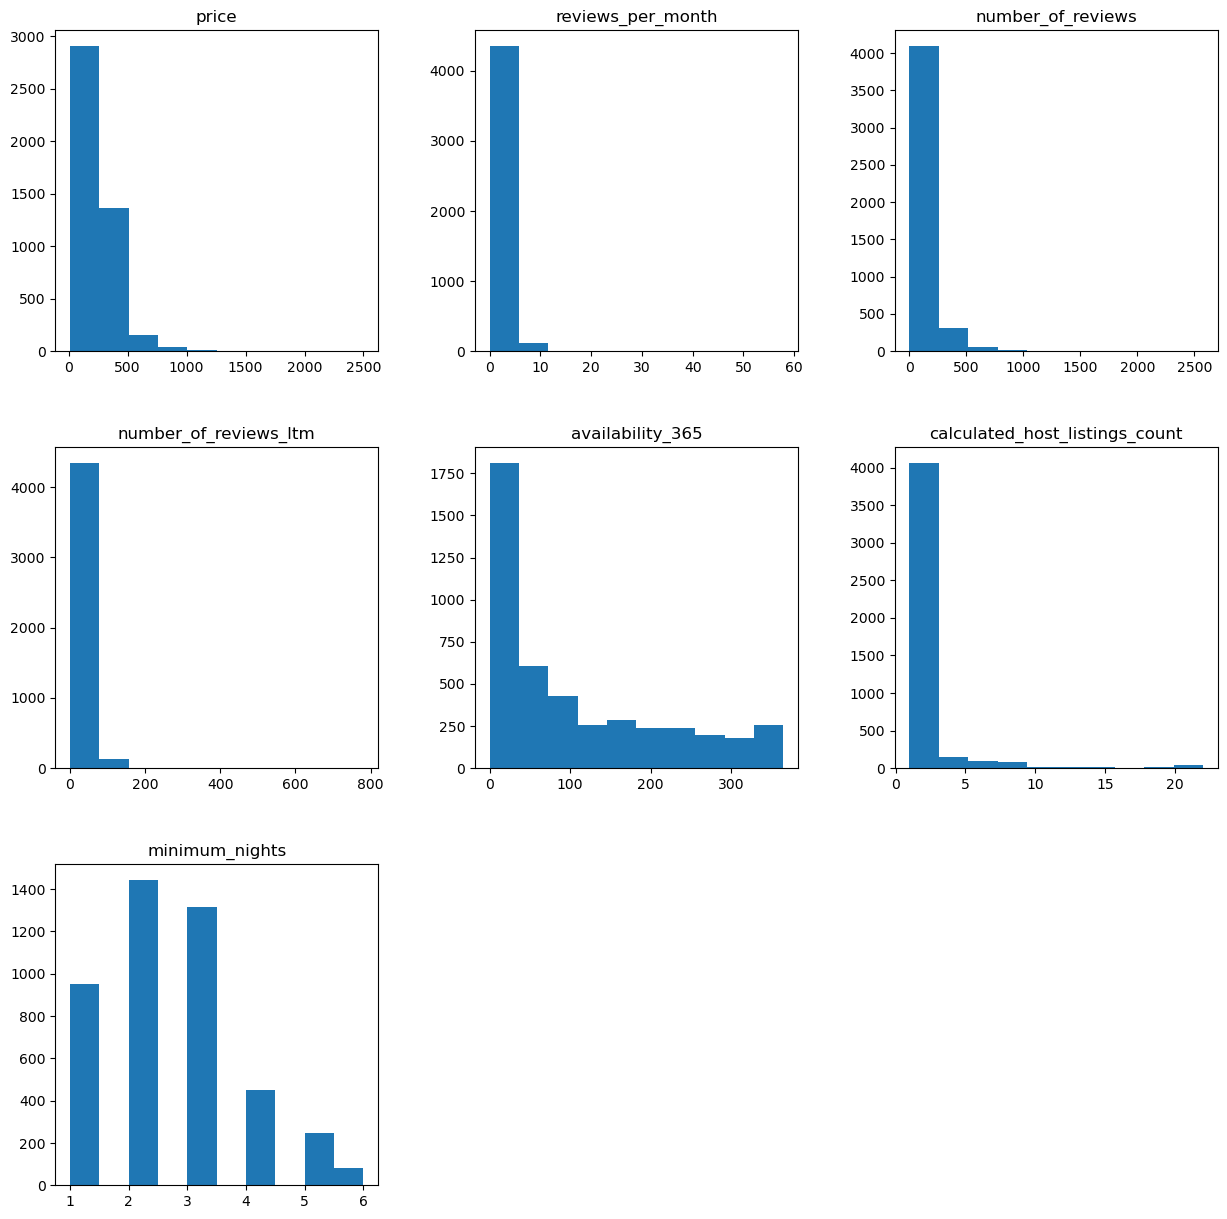

In [222]:
# plotting histograms for numerical variables
(df_clean.hist(column=['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights'],
               bins=10,
               grid=False,
               figsize=(15,15))
               );

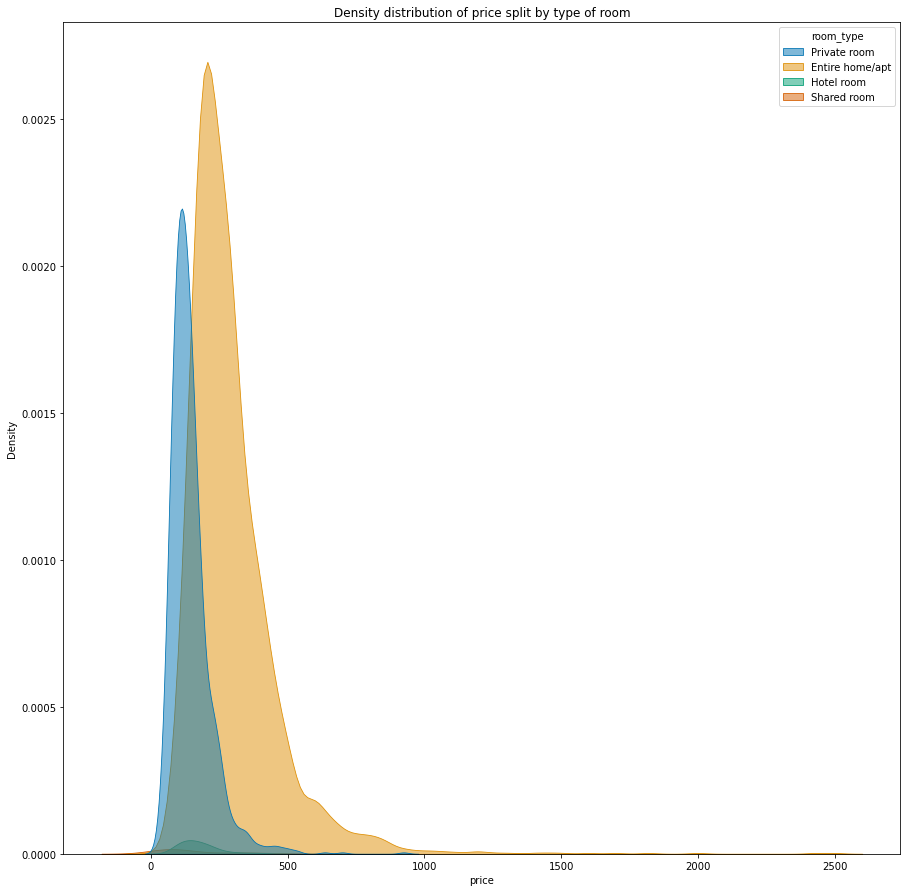

In [223]:
plt.figure(figsize=(15,15),dpi=72)
plt.title("Density distribution of price split by type of room")

sns.kdeplot(df_clean,x='price',hue='room_type',
            palette='colorblind',
            fill=True,
            alpha=0.5,
            linewidth=0.8);

### **Q4. What is the average price per night?**

Knowing the average price per night helps us understand the overall pricing trend in Amsterdam.

In [224]:
# checking average listing price
avg_price = df_clean.price.mean().round(2)
print(f"The average listing price is: ${avg_price}")

The average listing price is: $247.31


### **Q5. What is the correlation we observe between the variables in the dataset?**

Exploring correlations between variables can reveal interesting relationships. We create a correlation matrix and plot a heatmap.

In [225]:
# creating a correlation matrix
correlation = df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].corr()
# showing correlation matrix
display(correlation)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
price,1.000000,-0.233552,-0.252447,-0.230278,0.105035,-0.092200,0.119690
reviews_per_month,-0.233552,1.000000,0.752468,0.906374,0.021429,0.116707,-0.255390
number_of_reviews,-0.252447,0.752468,1.000000,0.811057,-0.005253,0.040485,-0.198146
number_of_reviews_ltm,-0.230278,0.906374,0.811057,1.000000,0.005700,0.084977,-0.231277
availability_365,0.105035,0.021429,-0.005253,0.005700,1.000000,0.246407,-0.137285
calculated_host_listings_count,-0.092200,0.116707,0.040485,0.084977,0.246407,1.000000,-0.261319
minimum_nights,0.119690,-0.255390,-0.198146,-0.231277,-0.137285,-0.261319,1.000000


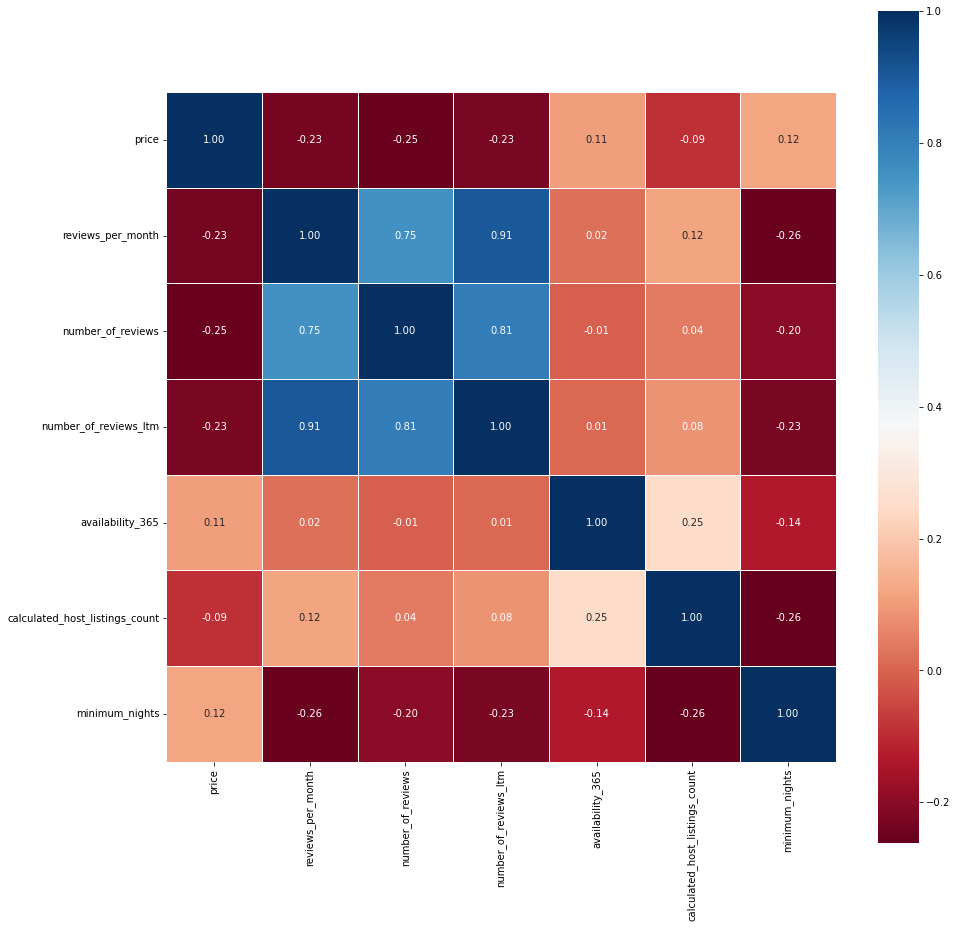

In [226]:
# plotting a heatmap showing correlation
plt.figure(figsize=(15,15),dpi=72)
sns.heatmap(correlation,cmap='RdBu',fmt='.2f',square=True,linecolor='white',linewidths=0.5,annot=True);

### **Q6. What type of listing is most frequent in Airbnb?**

We look at the distribution of room types to see which type is most commonly listed.

In [227]:
# amount of available listings per type
available_listings = df_clean[df_clean['availability_365'] != 0]
(available_listings.groupby(by=['room_type']).size()
 )

room_type
Entire home/apt    2897
Hotel room           30
Private room       1096
Shared room          15
dtype: int64

In [228]:
# showing the percentage of room types
display((available_listings.groupby(by=['room_type'])
  .size()/df_clean.shape[0])
  .round(4)*100
 )

room_type
Entire home/apt    64.49
Hotel room          0.67
Private room       24.40
Shared room         0.33
dtype: float64

In [229]:
pct_room_types = ((available_listings.groupby(by=['room_type'])
  .size()/df_clean.shape[0])
  .round(4)*100
  )
print(f"The type of listing on Airbnb that is most often rented out in Amsterdam is '{pct_room_types.index[0]}' accounting for {pct_room_types.iloc[0].round(2)}% of available listings.")

The type of listing on Airbnb that is most often rented out in Amsterdam is 'Entire home/apt' accounting for 64.49% of available listings.


### **Q7. What is the most expensive location?**

Identifying the most expensive neighbourhoods helps us understand where high-end properties are located.

In [230]:
# average price per neighbourhood
(df_clean.groupby(by=['neighbourhood'],as_index=True)['price']
 .mean()
 .sort_values(ascending=False)
 .round(2)
 )

neighbourhood
Zuid                                      284.83
De Pijp - Rivierenbuurt                   281.67
De Aker - Nieuw Sloten                    272.68
De Baarsjes - Oud-West                    265.14
Centrum-Oost                              263.53
Centrum-West                              254.26
Westerpark                                253.61
Oud-Noord                                 235.74
IJburg - Zeeburgereiland                  235.09
Oud-Oost                                  235.01
Watergraafsmeer                           230.50
Oostelijk Havengebied - Indische Buurt    220.05
Bos en Lommer                             218.29
Buitenveldert - Zuidas                    207.55
Noord-West                                187.75
Slotervaart                               185.58
Noord-Oost                                181.82
Osdorp                                    180.33
Geuzenveld - Slotermeer                   178.21
Bijlmer-Centrum                           150.38
Gaaspe

In [231]:
# printing the most expensive neighbourhood in terms of price per night
neighbourhood_price_per_night = (df_clean.groupby(by=['neighbourhood'],as_index=True)['price']
 .mean()
 .sort_values(ascending=False)
 .round(2)
 )

print(f"The most expensive neighbourhood to rent an Airbnb in Amsterdam is {neighbourhood_price_per_night.index[0]}, costing ${neighbourhood_price_per_night.iloc[0]} per night.")

The most expensive neighbourhood to rent an Airbnb in Amsterdam is Zuid, costing $284.83 per night.


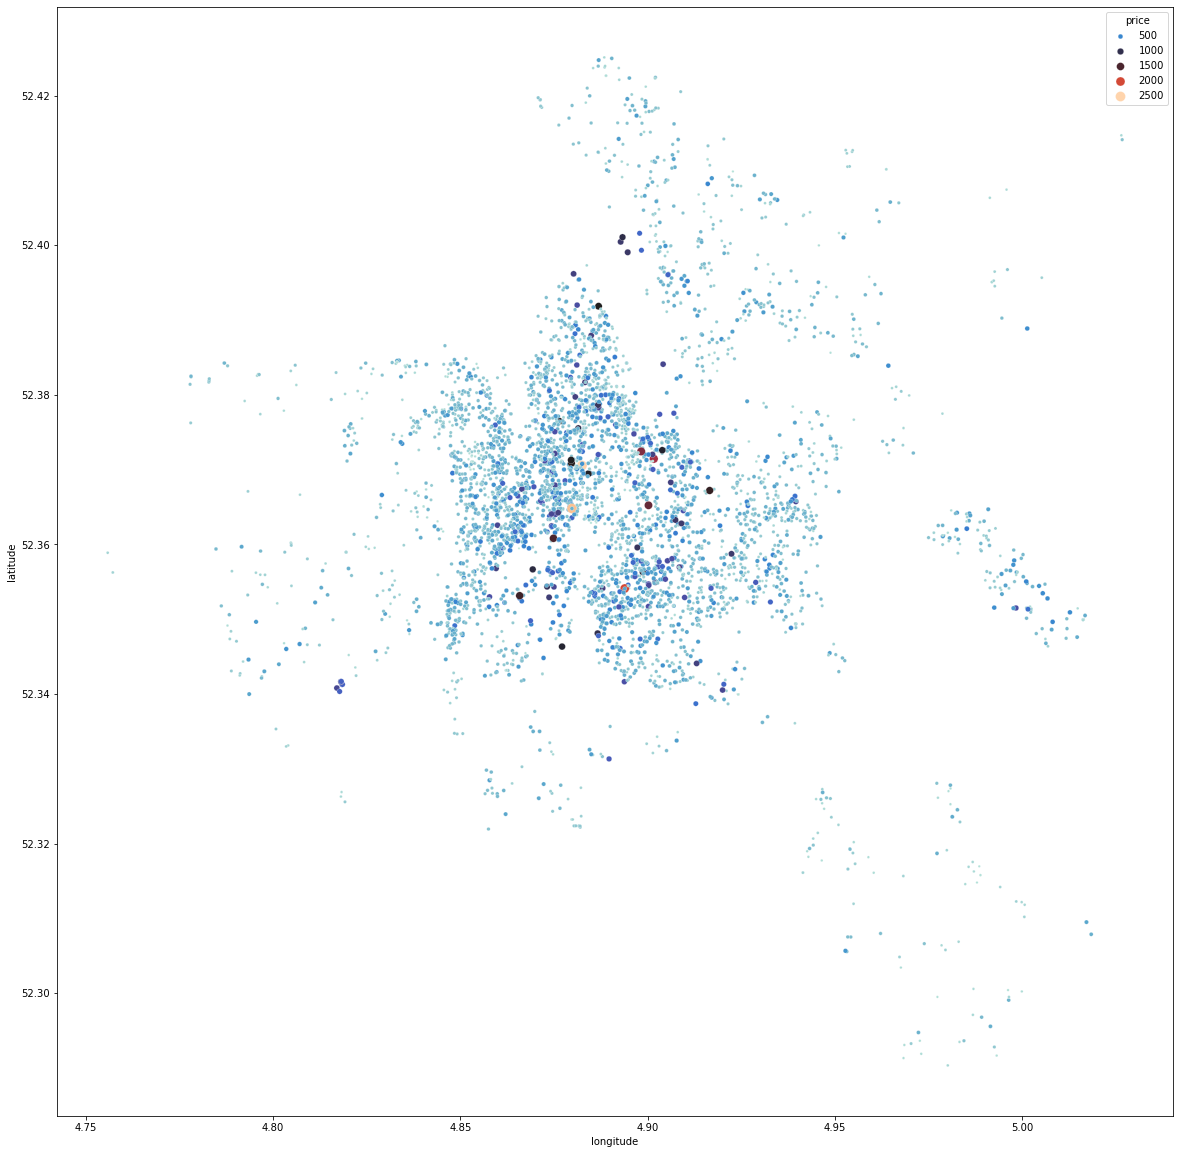

In [232]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(20,20),
           dpi=72,
           )
sns.scatterplot(data=df_clean,
                x='longitude',
                y='latitude',
                hue='price',
                palette='icefire',
                size='price',
                sizes=(5,100)
                );

In [233]:
# geopandas so we can import .shp files
import geopandas as gpd

# loading a shapefile with municipal boundaries of cities in The Netherlands
nl_shapefile = "./georef-netherlands-gemeente-millesime.shp"
nl_map = gpd.read_file(nl_shapefile)

nl_map

,year,prov_code,prov_name,gem_code,gem_name,gem_area_co,gem_type,gem_cbs_cod,geometry
0,2021,['26'],['Utrecht'],['0344'],['Utrecht'],NLD,Gemeente,['GM0344'],"POLYGON ((5.12683 52.05492, 5.12639 52.05498, ..."
1,2021,['27'],['Noord-Holland'],['0420'],['Medemblik'],NLD,Gemeente,['GM0420'],"POLYGON ((4.97920 52.67968, 4.97912 52.67982, ..."
2,2021,['25'],['Gelderland'],['1586'],['Oost Gelre'],NLD,Gemeente,['GM1586'],"POLYGON ((6.46219 52.02170, 6.46323 52.02156, ..."
3,2021,['31'],['Limburg'],['1507'],['Horst aan de Maas'],NLD,Gemeente,['GM1507'],"POLYGON ((5.93129 51.38475, 5.92754 51.38912, ..."
4,2021,['23'],['Overijssel'],['1896'],['Zwartewaterland'],NLD,Gemeente,['GM1896'],"POLYGON ((5.98102 52.62830, 5.98863 52.62932, ..."
...,...,...,...,...,...,...,...,...,...
347,2021,['26'],['Utrecht'],['0355'],['Zeist'],NLD,Gemeente,['GM0355'],"POLYGON ((5.19516 52.07735, 5.19488 52.07833, ..."
348,2021,['27'],['Noord-Holland'],['0406'],['Huizen'],NLD,Gemeente,['GM0406'],"POLYGON ((5.22459 52.32576, 5.22932 52.32526, ..."
349,2021,['27'],['Noord-Holland'],['0397'],['Heemstede'],NLD,Gemeente,['GM0397'],"POLYGON ((4.63965 52.33891, 4.63856 52.33877, ..."
350,2021,['30'],['Noord-Brabant'],['0766'],['Dongen'],NLD,Gemeente,['GM0766'],"POLYGON ((4.93317 51.67675, 4.93371 51.67687, ..."


In [234]:
# filtering for the limits of Amsterdam
amsterdam_map = nl_map[nl_map['gem_name'] == "['Amsterdam']"]
amsterdam_map

,year,prov_code,prov_name,gem_code,gem_name,gem_area_co,gem_type,gem_cbs_cod,geometry
101,2021,['27'],['Noord-Holland'],['0363'],['Amsterdam'],NLD,Gemeente,['GM0363'],"MULTIPOLYGON (((5.02154 52.30246, 5.02064 52.3..."


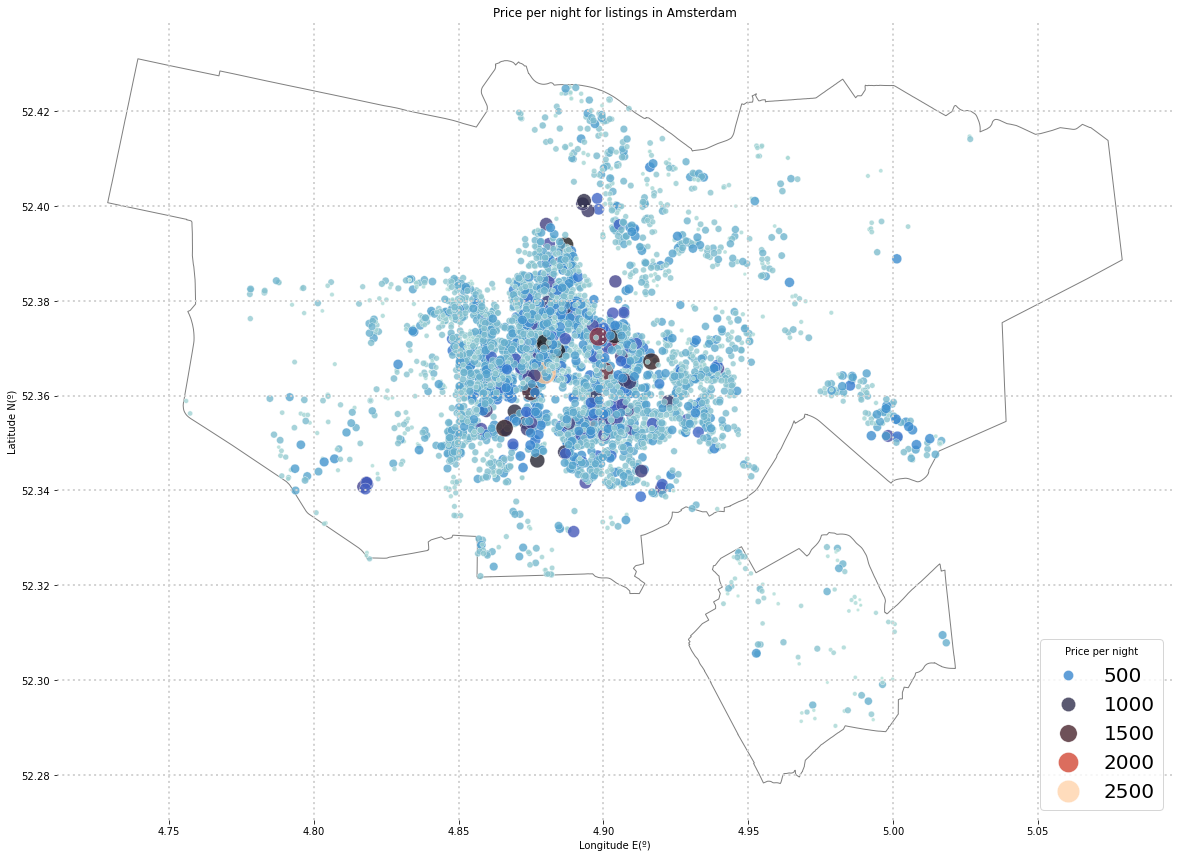

In [235]:
# creating the plot
f, ax = plt.subplots(1, figsize=(20,20),dpi=72)
ax = amsterdam_map.plot(color='white', edgecolor='grey', ax=ax)

# setting attributes
ax.set(title='Price per night for listings in Amsterdam',
       xlabel = 'Longitude E(º)',
       ylabel = 'Latitude N(º)'
       )

# setting a grid and turning off the boundary lines
ax.grid(True,color='lightgrey',linestyle='dotted',linewidth=2)
ax.spines[['top','bottom','right','left']].set_visible(False)

# plotting data on top of the outline
sns.scatterplot(data=df_clean,
                x='longitude',
                y='latitude',
                hue='price',
                palette='icefire',
                size='price',
                sizes=(5,500),
                alpha=0.8
                ).legend(title="Price per night",
                         prop={'size':20},
                         loc='lower right');

### **Q8. What is the average minimum nights a guest can rent a listing for?**

Finally, we calculate the average minimum nights required for booking a stay, giving us insights into typical booking policies.

Note: According to Dutch regulations, you can only rent out your entire home in Amsterdam for a maximum of 30 nights per year, unless you have a specific permit that allows you to rent out your home for more nights, such as a short term stay license.

In [236]:
# ver a média da coluna `minimum_nights``
avg_min_nights = int(df_clean.minimum_nights.mean().round(0))

print(f"Average minimum nights one must book an Airbnb listing for in Amsterdam is {avg_min_nights} nights.")

Average minimum nights one must book an Airbnb listing for in Amsterdam is 3 nights.


# Conclusion

In this analysis, we examined various aspects of Airbnb listings in Amsterdam, including the distribution of prices, the impact of reviews, and neighbourhood-specific trends. The insights gained can help inform potential Airbnb hosts and guests about market conditions and listing strategies.

## Insights

1. Properties listed in Amsterdam Zuid are the most expensive to rent, with an average price of € 284,00 per night. Meanwhile, the cheapest location for an Airbnb in Amsterdam is Bijmer-Oost, with an average price per night of € 124,00.
2. The average price per night one can expect when using Airbnb to stay in Amsterdam is € 247,00. 
3. Most users on Airbnb will find that most listings in Amsterdam are for entire homes or apartments (64% of total listings, against 24% private rooms and only 1% hotel rooms). 